<a href="https://colab.research.google.com/github/hossein20s/AnExample/blob/master/Data_preprocess.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!wget bit.ly/initnotebook -O init.ipynb
%run init.ipynb

--2019-06-24 03:58:57--  http://bit.ly/initnotebook
Resolving bit.ly (bit.ly)... 67.199.248.10, 67.199.248.11
Connecting to bit.ly (bit.ly)|67.199.248.10|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://raw.githubusercontent.com/hossein20s/notebook_snippets/master/InitializeNotebook.ipynb [following]
--2019-06-24 03:58:57--  https://raw.githubusercontent.com/hossein20s/notebook_snippets/master/InitializeNotebook.ipynb
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2560 (2.5K) [text/plain]
Saving to: ‘init.ipynb’

init.ipynb          100%[===================>]   2.50K  --.-KB/s    in 0s      

2019-06-24 03:58:57 (36.6 MB/s) - ‘init.ipynb’ saved [2560/2560]

Go to this URL in a browser: https://accounts.google.com/

Using TensorFlow backend.


save and load models from yaml and json files defined. Everything stored in folder  <built-in function dir>
save and load models from yaml and json files defined. Everything stored in folder  <built-in function dir>


# Data Retrieval

In [0]:
bucket = getGoogleCloudBucket()
!cp data/chsi_dataset.zip .
!unzip chsi_dataset.zip

Archive:  chsi_dataset.zip
  inflating: CHSI DataSet.xls        
  inflating: DATAELEMENTDESCRIPTION.csv  
  inflating: RISKFACTORSANDACCESSTOCARE.csv  
  inflating: PREVENTIVESERVICESUSE.csv  
  inflating: VUNERABLEPOPSANDENVHEALTH.csv  
  inflating: RELATIVEHEALTHIMPORTANCE.csv  
  inflating: MEASURESOFBIRTHANDDEATH.csv  
  inflating: SUMMARYMEASURESOFHEALTH.csv  
  inflating: LEADINGCAUSESOFDEATH.csv  
  inflating: DEMOGRAPHICS.csv        
  inflating: HEALTHYPEOPLE2010.csv   
  inflating: DEFINEDDATAVALUE.csv    
  inflating: CSV File Index.txt      


In [0]:
!gsutil cp *csv $bucket/data/CHSI/

In [0]:
!mkdir data/CHSI
!cp *csv data/CHSI

# Data Cleansing

In [0]:
import pandas as pd
MERGED_FILE = 'chsi.csv'
DATA_DIR = 'data/CHSI/'

DATA_FILE = 'LEADINGCAUSESOFDEATH.csv'
leadingDeathCause = pd.read_csv(DATA_DIR + DATA_FILE)
DATA_FILE = 'DEMOGRAPHICS.csv'
demographics = pd.read_csv(DATA_DIR + DATA_FILE)
DATA_FILE = 'PREVENTIVESERVICESUSE.csv'
preventiveServiceUse = pd.read_csv(DATA_DIR + DATA_FILE)
DATA_FILE = 'HEALTHYPEOPLE2010.csv'
healthyPeople = pd.read_csv(DATA_DIR + DATA_FILE)
DATA_FILE = 'MEASURESOFBIRTHANDDEATH.csv'
birthDeathMeasure = pd.read_csv(DATA_DIR + DATA_FILE)
DATA_FILE = 'SUMMARYMEASURESOFHEALTH.csv'
healthMeasures = pd.read_csv(DATA_DIR + DATA_FILE)
DATA_FILE = 'RELATIVEHEALTHIMPORTANCE.csv'
healthImportance = pd.read_csv(DATA_DIR + DATA_FILE)
DATA_FILE =  'VUNERABLEPOPSANDENVHEALTH.csv'
vunerable = pd.read_csv(DATA_DIR + DATA_FILE)
DATA_FILE = 'RISKFACTORSANDACCESSTOCARE.csv'
riskFactors = pd.read_csv(DATA_DIR + DATA_FILE)


In [0]:
import numpy as np

def replacePredefinedCalues(df):
  return df.replace(-2222, np.nan).replace(-2222.2, np.nan).replace(-2, np.nan).replace(-1, np.nan).replace(-1111, np.nan).replace(-1111.1, np.nan)
  
flags = [-2222, -2222.2, -2, -2, -1111.1, -1111]

In [8]:

#print(demographics[demographics.isin(flags).any() == True])
demographics = replacePredefinedCalues(demographics)
#print(demographics.isin(flags).any())
leadingDeathCause = replacePredefinedCalues(leadingDeathCause)
preventiveServiceUse = replacePredefinedCalues(preventiveServiceUse)
healthyPeople = replacePredefinedCalues(healthyPeople)
birthDeathMeasure = replacePredefinedCalues(birthDeathMeasure)
healthMeasures = replacePredefinedCalues(healthMeasures)
vunerable = replacePredefinedCalues(vunerable)
riskFactors = replacePredefinedCalues(riskFactors)
print(riskFactors[riskFactors['Smoker'].isnull()].index.tolist())
healthImportance = replacePredefinedCalues(healthImportance)
#print(healthMeasures.iloc[89])
healthMeasures.to_csv(DATA_DIR + 'healthMeasure.csv')

[3, 5, 12, 14, 18, 20, 29, 30, 31, 32, 33, 37, 42, 46, 49, 52, 59, 64, 65, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 99, 115, 145, 147, 148, 156, 161, 163, 182, 185, 186, 188, 189, 191, 194, 197, 201, 205, 206, 208, 209, 215, 229, 230, 234, 235, 236, 241, 245, 246, 247, 251, 252, 253, 254, 255, 256, 259, 266, 268, 269, 270, 271, 273, 274, 275, 278, 279, 282, 283, 288, 290, 294, 297, 298, 299, 300, 303, 305, 324, 331, 335, 337, 338, 340, 346, 350, 355, 356, 364, 379, 380, 382, 385, 386, 387, 388, 390, 394, 402, 403, 405, 408, 410, 411, 414, 416, 423, 425, 426, 430, 433, 434, 438, 446, 454, 455, 458, 461, 463, 464, 468, 469, 470, 474, 475, 480, 482, 483, 484, 486, 498, 501, 502, 503, 504, 507, 509, 512, 514, 515, 517, 519, 523, 526, 527, 529, 533, 534, 536, 540, 541, 542, 546, 561, 565, 579, 594, 595, 597, 598, 599, 600, 601, 604, 605, 606, 609, 610, 612, 615, 616, 618, 619, 622, 623, 625, 627, 628, 632, 634, 635, 636, 643

Description can be found here [link text](https://docs.google.com/spreadsheets/d/145Wwp1ssa7wQW693PhfBdx0DafAqNcpvUK_-VGYXpAA) 

Plpus using Google Spreadsheet explore feature you can see the following graphs [link text](https://docs.google.com/spreadsheets/d/1tD2aY89NI8nzoMzKMcfCJRj6Oca8v8HGN1c5v4Xz1Mo) and 
![alt text](https://lh3.googleusercontent.com/dRuXTpzoaR9nnyaAwPaUMPpkHlA72yFEbmkfmERpTZJ6iRwqUaWk5YZWGLz6ipCu5opAyE-Nvc_9C855r9rxzoRWW1Dc7z-GIPl3Yy9hwP4I9fVbm4rziMFBo8wg9QVenXZjHH31wz4=w2400)


In [9]:
import numpy 
print(demographics.shape)
print(leadingDeathCause.shape)
print(preventiveServiceUse.shape)
print(healthyPeople.shape)
print(birthDeathMeasure.shape)

commonColumns = demographics.columns.intersection(leadingDeathCause.columns) #np.intersect1d(demographics.columns, leadingDeathCause.columns)
df = demographics
df.index.name = 'index'
df = pd.merge(df, leadingDeathCause, how='outer', left_on=commonColumns.to_list(), right_on=commonColumns.to_list())
print(df.shape)
commonColumns = df.columns.intersection(preventiveServiceUse.columns)
df = pd.merge(df, preventiveServiceUse, how='outer', left_on=commonColumns.to_list(), right_on=commonColumns.to_list())
print(df.shape)
#commonColumns = df.columns.intersection(healthyPeople.columns)
#print(commonColumns)
#df = pd.merge(df, healthyPeople, how='outer', left_on=commonColumns.to_list(), right_on=commonColumns.to_list())
#print(df.shape)
commonColumns = df.columns.intersection(birthDeathMeasure.columns)
df = pd.merge(df, birthDeathMeasure, how='outer', left_on=commonColumns.to_list(), right_on=commonColumns.to_list())
print(df.shape)
commonColumns = df.columns.intersection(healthMeasures.columns)
df = pd.merge(df, healthMeasures, how='outer', left_on=commonColumns.to_list(), right_on=commonColumns.to_list())
print(df.shape)
commonColumns = df.columns.intersection(riskFactors.columns)
df = pd.merge(df, riskFactors, how='outer', left_on=commonColumns.to_list(), right_on=commonColumns.to_list())
commonColumns = df.columns.intersection(vunerable.columns)
df = pd.merge(df, vunerable, how='outer', left_on=commonColumns.to_list(), right_on=commonColumns.to_list())
print(df.shape)
commonColumns = df.columns.intersection(healthImportance.columns)
df = pd.merge(df, healthImportance, how='outer', left_on=commonColumns.to_list(), right_on=commonColumns.to_list())

df = df.drop(columns=['State_FIPS_Code', 'CHSI_County_Name',
       'CHSI_State_Name', 'CHSI_State_Abbr', 'Strata_ID_Number',
        'US_ALE', 'US_All_Death','US_Health_Status', 'US_Unhealthy_Days',
        'Strata_Determining_Factors' ])
print(df.shape)

df.to_csv(DATA_DIR + MERGED_FILE)

(3141, 44)
(3141, 235)
(3141, 43)
(22, 4)
(3141, 141)
(3141, 273)
(3141, 310)
(3141, 445)
(3141, 467)
(3141, 514)


,County_FIPS_Code,Number_Counties,Population_Size,Min_Population_Size,Max_Population_Size,Population_Density,Min_Population_Density,Max_Population_Density,Poverty,Min_Poverty,Max_Poverty,Age_19_Under,Min_Age_19_Under,Max_Age_19_Under,Age_19_64,Min_Age_19_64,Max_Age_19_65,Age_65_84,Min_Age_65_84,Max_Age_65_85,Age_85_and_Over,Min_Age_85_and_Over,Max_Age_85_and_Over,White,Min_White,Max_White,Black,Min_Black,Max_Black,Native_American,Min_Native_American,Max_Native_American,Asian,Min_Asian,Max_Asian,Hispanic,Min_Hispanic,Max_Hispanic,A_Wh_Comp,CI_Min_A_Wh_Comp,...,Recent_Drug_Use,Ecol_Rpt,Ecol_Rpt_Ind,Ecol_Exp,Salm_Rpt,Salm_Rpt_Ind,Salm_Exp,Shig_Rpt,Shig_Rpt_Ind,Shig_Exp,Toxic_Chem,Carbon_Monoxide_Ind,Nitrogen_Dioxide_Ind,Sulfur_Dioxide_Ind,Ozone_Ind,Particulate_Matter_Ind,Lead_Ind,EH_Time_Span,RHI_LBW_Ind,RHI_VLBW_Ind,RHI_Premature_Ind,RHI_Under_18_Ind,RHI_Over_40_Ind,RHI_Unmarried_Ind,RHI_Late_Care_Ind,RHI_Infant_Mortality_Ind,RHI_IM_Wh_Non_Hisp_Ind,RHI_IM_Bl_Non_Hisp_Ind,RHI_IM_Hisp_Ind,RHI_IM_Neonatal_Ind,RHI_IM_Postneonatal_Ind,RHI_Brst_Cancer_Ind,RHI_Col_Cancer_Ind,RHI_CHD_Ind,RHI_Homicide_Ind,RHI_Lung_Cancer_Ind,RHI_MVA_Ind,RHI_Stroke_Ind,RHI_Suicide_Ind,RHI_Injury_Ind
0,1,37,48612,28447,55936,82.0,40.0,141.0,10.4,9.5,12.9,26.9,23.7,32.3,62.3,58.8,64.1,9.8,7.3,12.0,0.9,0.8,2.1,80.7,80.7,98.5,17.3,0.4,17.3,0.5,0.1,1.1,0.6,0.2,2.2,1.7,0.8,19.2,NaN,NaN,...,2394,2.0,3.0,4.0,50.0,4.0,31.0,4.0,3.0,11.0,2883197.0,1,1,1,1,1,1,1999-2003,8.0,8.0,8.0,8.0,5.0,5.0,5.0,5.0,5.0,7.0,NaN,5.0,8.0,8.0,5.0,6.0,8.0,8.0,8.0,8.0,8.0,7.0
1,3,27,162586,118395,277035,102.0,39.0,457.0,10.2,9.7,12.9,23.5,21.3,25.4,60.3,55.3,62.0,14.5,11.8,19.5,1.8,1.9,3.4,88.4,83.5,96.3,9.9,1.0,14.1,0.5,0.1,1.1,0.4,0.4,3.3,2.3,0.8,13.7,57.0,39.0,...,7753,2.0,3.0,4.0,99.0,4.0,67.0,41.0,4.0,13.0,35664.0,1,1,1,2,1,1,2001-2003,8.0,8.0,8.0,8.0,5.0,5.0,5.0,6.0,6.0,5.0,NaN,8.0,5.0,5.0,5.0,5.0,7.0,8.0,8.0,5.0,8.0,7.0


(3141, 526)
Index(['County_FIPS_Code', 'Number_Counties', 'Population_Size',
       'Min_Population_Size', 'Max_Population_Size', 'Population_Density',
       'Min_Population_Density', 'Max_Population_Density', 'Poverty',
       'Min_Poverty',
       ...
       'RHI_IM_Postneonatal_Ind', 'RHI_Brst_Cancer_Ind', 'RHI_Col_Cancer_Ind',
       'RHI_CHD_Ind', 'RHI_Homicide_Ind', 'RHI_Lung_Cancer_Ind', 'RHI_MVA_Ind',
       'RHI_Stroke_Ind', 'RHI_Suicide_Ind', 'RHI_Injury_Ind'],
      dtype='object', length=526)


# Using AutoML

In [0]:
!gsutil cp df2.csv gs://vitabrain/data/

Copying file://df2.csv [Content-Type=text/csv]...
/ [1 files][  6.9 MiB/  6.9 MiB]                                                
Operation completed over 1 objects/6.9 MiB.                                      


# Using Seaborn

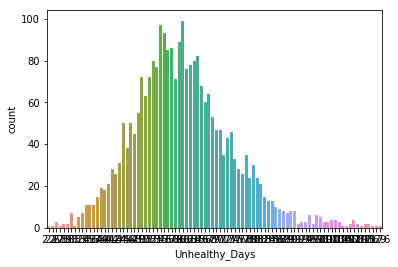

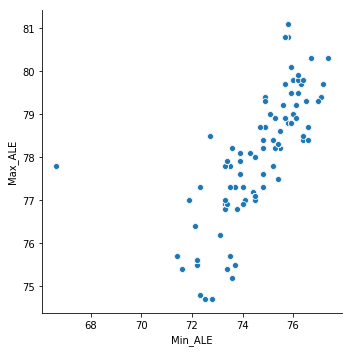

In [0]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

sns.countplot(data=healthMeasures,
                  x=healthMeasures['Unhealthy_Days'])
plt.show()

sns.relplot(x='Min_ALE', y='Max_ALE', data=healthMeasures)
plt.show()

Let see if self rating on health Health_Status correlated to US Average Life Execpency ALE and Unhealthy_Days

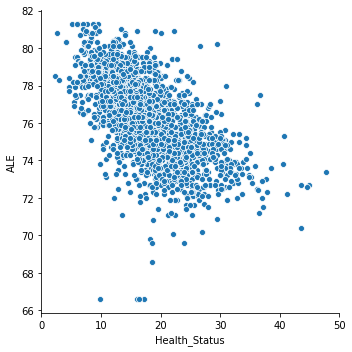

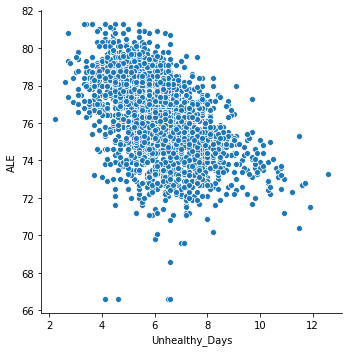

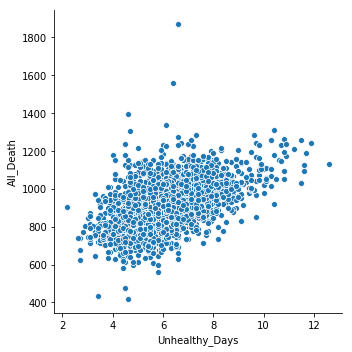

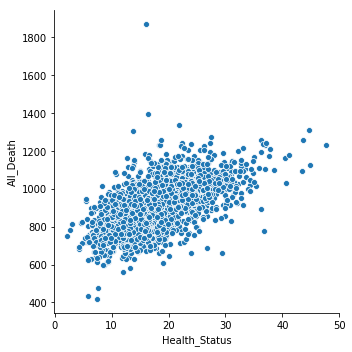

In [0]:
sns.relplot(x='Health_Status', y='ALE', data=healthMeasures)
plt.show()
sns.relplot(x='Unhealthy_Days', y='ALE', data=healthMeasures)
plt.show()
sns.relplot(x='Unhealthy_Days', y='All_Death', data=healthMeasures)
plt.show()


sns.relplot(x='Health_Status', y='All_Death', data=healthMeasures)